In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyrsm as rsm
from datetime import timedelta
from datetime import datetime


data = pd.read_csv('DA/social_data.xlsx - Data.csv')

In [2]:
data.head(10)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video
5,03-31-2023 19:42,CSGO,TWITTER,N/A,0,0,Photo
6,03-31-2023 19:40,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,03-31-2023 19:23,CSGO,TWITTER,Community Engagement,17892,3076,Video
8,03-31-2023 19:15,CSGO,TWITTER,N/A,0,0,Video
9,03-31-2023 18:55,CSGO,TWITTER,Community Engagement,13874,1447,Video


# Data Cleaning and Exploration

In [3]:
data.shape

(3479, 7)

In [4]:
data.describe(include = 'all',datetime_is_numeric=True)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
count,3479,3479,3479,3479,3479.000000,3479.000000,3479
unique,2411,6,6,4,NaN,NaN,7
top,03-29-2023 13:00,General,TWITTER,N/A,NaN,NaN,Photo
freq,12,2271,1951,1485,NaN,NaN,1490
mean,NaN,NaN,NaN,NaN,10972.453579,947.390629,NaN
std,NaN,NaN,NaN,NaN,29577.108063,3468.628038,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,167.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,1884.000000,39.000000,NaN
75%,NaN,NaN,NaN,NaN,12467.000000,276.500000,NaN


In [5]:
data.count() * 100 / len(data)

Published Date       100.0
Account              100.0
Account Type         100.0
Campaign Name        100.0
Total Impressions    100.0
Total Engagements    100.0
Media Type           100.0
dtype: float64

In [6]:
unique_accounts = data['Account'].unique()
unique_accounts

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

- After checking the type of Accounts, I observed that there are 2 types of General. One with a space in it, I have removed the space and continued the data exploration

In [7]:
data['Account'] = data['Account'].str.replace('General ', 'General')

In [8]:
unique_accounts1 = data['Campaign Name'].unique()
unique_accounts1

array(['N/A ', 'Community Engagement ', 'Evergreen ', 'Evil Exhibited '],
      dtype=object)

In [9]:
unique_campaigns = data['Account'].unique()
unique_campaigns

array(['CSGO', 'General', 'DOTA2', 'Content Creators', 'Valorant'],
      dtype=object)

In [10]:
unique_account_types_CSGO = data[data['Account'] == 'CSGO']['Account Type'].unique()
unique_campaign_types_CSGO = data[data['Account'] == 'CSGO']['Campaign Name'].unique()

unique_account_types_CSGO, unique_campaign_types_CSGO

(array(['TWITTER'], dtype=object),
 array(['N/A ', 'Community Engagement '], dtype=object))

- We have observed a lot of N/A's for the account CSGO and it has only onw account type as twitter. Assuming that CSGO has account type as twitter and only one campaign name, it makes sense to fill the   

In [11]:
filtered_data = data[data['Campaign Name'].str.strip() != 'N/A']
filtered_data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video
6,03-31-2023 19:40,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,03-31-2023 19:23,CSGO,TWITTER,Community Engagement,17892,3076,Video
9,03-31-2023 18:55,CSGO,TWITTER,Community Engagement,13874,1447,Video
10,03-31-2023 18:36,General,FBPAGE,Community Engagement,37692,8044,Photo
...,...,...,...,...,...,...,...
3440,01-08-2023 11:47,General,TWITTER,Community Engagement,19823,243,Photo
3459,01-05-2023 09:00,CSGO,TWITTER,Community Engagement,445130,10597,Video
3461,01-04-2023 14:57,General,FBPAGE,Community Engagement,155521,19098,Photo
3464,01-04-2023 13:00,General,TWITTER,Community Engagement,136660,2371,Photo


- I have filtered the data where the campaign name is having NA's in the dataset for further analysis

In [12]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 4 to 3465
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Published Date     1994 non-null   object
 1   Account            1994 non-null   object
 2   Account Type       1994 non-null   object
 3   Campaign Name      1994 non-null   object
 4   Total Impressions  1994 non-null   int64 
 5   Total Engagements  1994 non-null   int64 
 6   Media Type         1994 non-null   object
dtypes: int64(2), object(5)
memory usage: 124.6+ KB


In [13]:
filtered_data['Published Date'] = pd.to_datetime(filtered_data['Published Date'])
filtered_data.dtypes

/tmp/ipykernel_73709/735474853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Published Date'] = pd.to_datetime(filtered_data['Published Date'])


Published Date       datetime64[ns]
Account                      object
Account Type                 object
Campaign Name                object
Total Impressions             int64
Total Engagements             int64
Media Type                   object
dtype: object

In [14]:
## Creating 2 different values as date and time as the published date has time and date attached together

filtered_data['Date'] = filtered_data['Published Date'].dt.date
filtered_data['Time'] = filtered_data['Published Date'].dt.time

/tmp/ipykernel_73709/1322540408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = filtered_data['Published Date'].dt.date
/tmp/ipykernel_73709/1322540408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time'] = filtered_data['Published Date'].dt.time


In [15]:
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

/tmp/ipykernel_73709/2541963503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])


In [16]:
filtered_data["Month"] = filtered_data["Date"].dt.to_period("M")
filtered_data["MonthName"] = filtered_data["Date"].dt.strftime("%B")
filtered_data['Year-Month'] = filtered_data['Date'].dt.strftime('%Y-%m')

/tmp/ipykernel_73709/3637700185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Month"] = filtered_data["Date"].dt.to_period("M")
/tmp/ipykernel_73709/3637700185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["MonthName"] = filtered_data["Date"].dt.strftime("%B")
/tmp/ipykernel_73709/3637700185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [17]:
## Individual days and the respective data available

count_day = filtered_data.groupby('Date').count()
count_day.head(20)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Time,Month,MonthName,Year-Month
Date,,,,,,,,,,,
2023-01-04,3,3,3,3,3,3,3,3,3,3,3
2023-01-05,1,1,1,1,1,1,1,1,1,1,1
2023-01-08,1,1,1,1,1,1,1,1,1,1,1
2023-01-10,9,9,9,9,9,9,9,9,9,9,9
2023-01-11,1,1,1,1,1,1,1,1,1,1,1
2023-01-12,3,3,3,3,3,3,3,3,3,3,3
2023-01-15,1,1,1,1,1,1,1,1,1,1,1
2023-01-17,6,6,6,6,6,6,6,6,6,6,6
2023-01-19,7,7,7,7,7,7,7,7,7,7,7


### From the above table we can see that 

- 24th, 25th, 26th and 27th have a huge number of number of campaigns going out and there are a lot of engagements during the 4th week of January.

- If we play around with the above code, we can see that every 4th week of the month we are having high impressions and engagements. One of the reason can be the budget cycle of the company starts in the 4th week of the month, the gamers receive their paychecks during the month end, some of the competitors are posting during the month end.   

In [18]:
filtered_data.describe()

,Total Impressions,Total Engagements
count,1994.000000,1994.000000
mean,15483.991976,1140.019559
std,32784.477628,3244.459612
min,0.000000,0.000000
25%,1300.250000,18.000000
50%,6242.500000,110.500000
75%,18345.000000,516.000000
max,452337.000000,41102.000000


In [19]:
for column in filtered_data.columns:
    unique_values = filtered_data[column].nunique()
    print(f"Column '{column}' has {unique_values} unique value(s).")

Column 'Published Date' has 1453 unique value(s).
Column 'Account' has 5 unique value(s).
Column 'Account Type' has 6 unique value(s).
Column 'Campaign Name' has 3 unique value(s).
Column 'Total Impressions' has 1786 unique value(s).
Column 'Total Engagements' has 836 unique value(s).
Column 'Media Type' has 6 unique value(s).
Column 'Date' has 79 unique value(s).
Column 'Time' has 658 unique value(s).
Column 'Month' has 3 unique value(s).
Column 'MonthName' has 3 unique value(s).
Column 'Year-Month' has 3 unique value(s).


In [20]:
total_impressions = filtered_data['Total Impressions'].sum()
total_engagements = filtered_data['Total Engagements'].sum()

In [21]:
# Group by Account Type, Media Type, Campaign Name together
grouped_by = filtered_data.groupby(['Account Type', 'Media Type', 'Campaign Name']).sum()
print("\nGrouped by Media Type and Campaign Name:")
print(grouped_by[['Total Impressions', 'Total Engagements']])


Grouped by Media Type and Campaign Name:
                                                   Total Impressions  \
Account Type     Media Type Campaign Name                              
FBPAGE           Link       Community Engagement                   0   
                            Evil Exhibited                      6416   
                 Photo      Community Engagement             6456566   
                            Evil Exhibited                    441010   
                 Text       Community Engagement              696958   
                 Video      Community Engagement             1718706   
                            Evergreen                          61643   
                            Evil Exhibited                     80454   
INSTAGRAM        Carousel   Community Engagement              150663   
                            Evil Exhibited                     10026   
                 Photo      Community Engagement              940349   
                      

/tmp/ipykernel_73709/2992484364.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by = filtered_data.groupby(['Account Type', 'Media Type', 'Campaign Name']).sum()


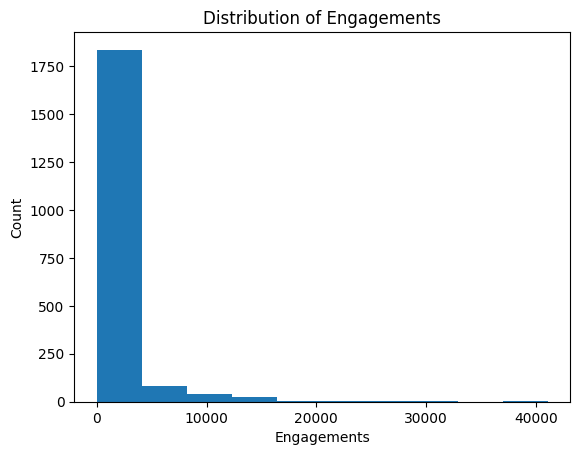

In [22]:
# Plotting the distribution of engagements
plt.hist(filtered_data['Total Engagements'], bins=10)
plt.xlabel('Engagements')
plt.ylabel('Count')
plt.title('Distribution of Engagements')
plt.show()

- From the above graph we could see that the engagements graph is right skewed and the data is not distributed normally

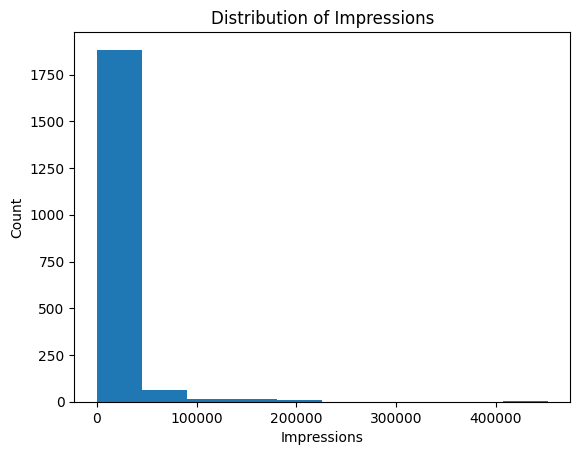

In [23]:
# Plotting the distribution of impressions
plt.hist(filtered_data['Total Impressions'], bins=10)
plt.xlabel('Impressions')
plt.ylabel('Count')
plt.title('Distribution of Impressions')
plt.show()

- From the above graph we could see that the impressions graph is right skewed and the data is not distributed normally

- The reason for this is because we have more impressions during the 4th week of the months and the data is becoming skewed because of it.

- To resolve this issue we can apply the logarithmic function if we use a linear regression model but in this case, we are just exploring the data.

In [24]:
# Log transformation of engagements and impressions
filtered_data['Engagements_log'] = np.log1p(filtered_data['Total Engagements'])
filtered_data['Impressions_log'] = np.log1p(filtered_data['Total Impressions'])

/tmp/ipykernel_73709/2293447970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Engagements_log'] = np.log1p(filtered_data['Total Engagements'])
/tmp/ipykernel_73709/2293447970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Impressions_log'] = np.log1p(filtered_data['Total Impressions'])


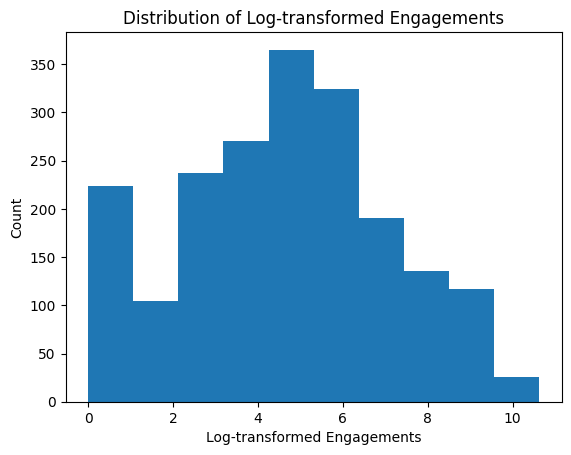

In [25]:
# Plotting the log-transformed distributions
plt.hist(filtered_data['Engagements_log'], bins=10)
plt.xlabel('Log-transformed Engagements')
plt.ylabel('Count')
plt.title('Distribution of Log-transformed Engagements')
plt.show()

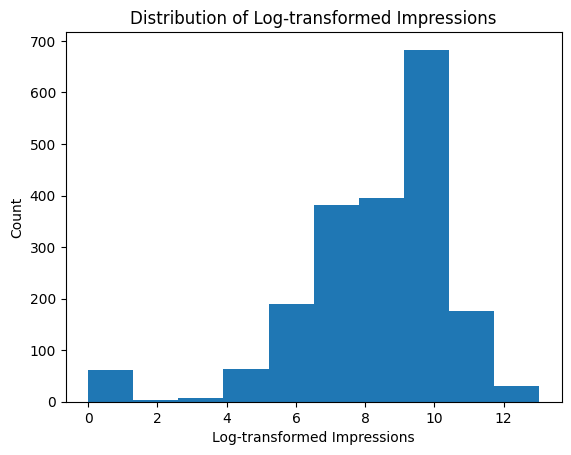

In [26]:
plt.hist(filtered_data['Impressions_log'], bins=10)
plt.xlabel('Log-transformed Impressions')
plt.ylabel('Count')
plt.title('Distribution of Log-transformed Impressions')
plt.show()

- In the above 2 graphs we could see the data is now normally distributed after applying the logarithmic function.
- We can use this log values if we are implementing a linear regression model

In [27]:
filtered_data['Engagement Rate'] = (filtered_data['Total Engagements'] / filtered_data['Total Impressions']) * 100
filtered_data['Engagement Rate Log'] = (filtered_data['Engagements_log'] / filtered_data['Impressions_log']) * 100

/tmp/ipykernel_73709/4252004082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Engagement Rate'] = (filtered_data['Total Engagements'] / filtered_data['Total Impressions']) * 100
/tmp/ipykernel_73709/4252004082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Engagement Rate Log'] = (filtered_data['Engagements_log'] / filtered_data['Impressions_log']) * 100


# Question 1 - What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [28]:
engagement_rate = filtered_data['Engagement Rate'].mean()
engagement_rate

4.988052408190703

### The average engagement rate is approximately 5% and for further analysis I have grouped by account type so that we can target specific channels to improve the engagement rate

In [29]:
data_er_at = filtered_data.groupby('Account Type')['Engagement Rate'].mean()

In [30]:
data_er_at

Account Type
FBPAGE              14.605891
INSTAGRAM            1.228905
LINKEDIN_COMPANY     1.931654
TIKTOK_BUSINESS      4.805182
TWITTER              3.385004
YOUTUBE              5.306207
Name: Engagement Rate, dtype: float64

### From the above table we can observe

- Facebook has highest engagement rate
- Instagram has the least engagement rate

In [31]:
data_er_at_cm = filtered_data.groupby(['Account Type', 'Campaign Name'])['Engagement Rate'].mean()
data_er_at_cm

Account Type      Campaign Name        
FBPAGE            Community Engagement     15.992891
                  Evergreen                13.098000
                  Evil Exhibited            3.513447
INSTAGRAM         Community Engagement      1.208653
                  Evergreen                 1.744471
                  Evil Exhibited            0.815349
LINKEDIN_COMPANY  Community Engagement      1.860454
                  Evil Exhibited            3.213268
TIKTOK_BUSINESS   Community Engagement      6.422724
                  Evergreen                 4.832811
                  Evil Exhibited            3.770242
TWITTER           Community Engagement      3.476648
                  Evergreen                11.770774
                  Evil Exhibited            2.987679
YOUTUBE           Community Engagement      8.240741
                  Evergreen                 3.881755
                  Evil Exhibited            5.023604
Name: Engagement Rate, dtype: float64

- From the above table we can see observe that the community engagement is having the highest Engagement rate when we have grouped by account type and further by the campaign name

### We can achieve the likelihood of reaching the overall engagement rate to 15%

- Content optimization: When we upload an advertisement or other content, it must be simple to comprehend and appealing to the intended audience.

- Call to Action: In the posts we need to have an accurate Call to Action and encourage the targeted audience to like, share, comment on the post.

- After posting on the social media channels we need to continuously monitor the activity by tracking metrics like engagement rate, analyze patterns based on the week and day so that we can plan the posts on a particular time.

- From the table of engagement rates split by account type, we could see that Instagram and Linkedin have low engagement rates. This shows us that we should increase our focus on them as Instagram and Linkedin have a huge customer base and if we target the right set of audience, we can increase the engagement rate to 15%.

# Question 2 - Does day of the week and time of posting affect engagement rates?

In [32]:
filtered_data['Day of Week'] = filtered_data['Published Date'].dt.day_name()
filtered_data['Hour of Day'] = filtered_data['Published Date'].dt.hour

/tmp/ipykernel_73709/548829108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Day of Week'] = filtered_data['Published Date'].dt.day_name()
/tmp/ipykernel_73709/548829108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour of Day'] = filtered_data['Published Date'].dt.hour


In [33]:
engagement_by_day = filtered_data.groupby('Day of Week')['Engagement Rate'].mean()

engagement_by_hour = filtered_data.groupby('Hour of Day')['Engagement Rate'].mean()

In [34]:
engagement_by_day

Day of Week
Friday       5.361005
Monday       3.776978
Saturday     3.763286
Sunday       5.062531
Thursday     4.785392
Tuesday      6.706608
Wednesday    4.391334
Name: Engagement Rate, dtype: float64

In [35]:
engagement_by_hour

Hour of Day
0           NaN
3      5.656221
4      5.575346
5     14.581538
6      5.716081
7      6.803701
8      7.818131
9      6.033080
10     4.177647
11     4.504934
12     5.247867
13     5.133669
14     4.605707
15     3.352191
16     4.418379
17     3.095850
18     4.458639
19     3.900000
20     5.334391
21     6.089147
22     2.059433
23     2.859394
Name: Engagement Rate, dtype: float64

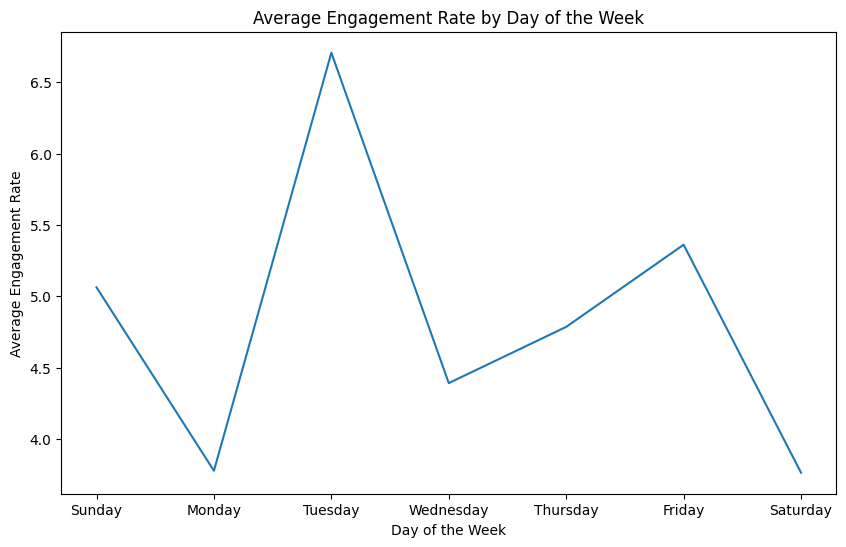

In [36]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 6))
engagement_by_day.reindex(day_order).plot()
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Day of the Week')
plt.grid(False)
plt.show()

### Observations

- From the above graph, we can see that the engagement rate is high on Tuesdays and Fridays.
- It is the least on Saturdays and Wednesdays.

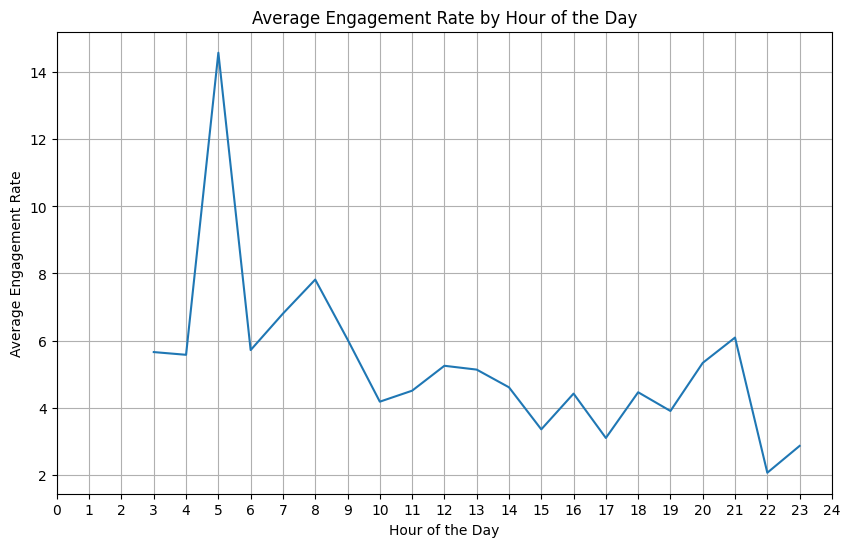

In [37]:
plt.figure(figsize=(10, 6))
engagement_by_hour.plot()
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by Hour of the Day')
plt.xticks(range(25))
plt.grid(True)
plt.show()

### Observations

- From the above graph we could see that the engagement rate is high at 5:00 am in the morning and it gradually decreases till the time evening 4 pm and again there is a rise at 8:00 pm.

- We do not have any engagement rates between 12:00 am to 2:00 am.

### Recommendations

- Based on the above 2 graphs to achieve the maximum engagement rate, we need to post on tuesdays and fridays during 5 am and 9 am.

- We should not be posting anything during the midnight and especially on Wednesdays and Saturdays as we might lose lot of potential customers who might interact with the post.

# Question 3 -  How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [38]:
grouped_by_account = filtered_data.groupby('Account').mean()
print("\nGrouped by Account:")
print(grouped_by_account['Engagement Rate'])


Grouped by Account:
Account
CSGO                 3.798739
Content Creators    18.670179
DOTA2                5.212327
General              5.030611
Valorant             5.374779
Name: Engagement Rate, dtype: float64


/tmp/ipykernel_73709/138766022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_account = filtered_data.groupby('Account').mean()


### Observations

- From the above table we could see that the engagement rate is high for Valorant and DOTA2 ( nearly 5%). We can concentrate less when compared to CSGO, but we need to keep improving our strategies to stay up to the market level.
- We need to concentrate more on CSGO as it has the least engagement rate (nearly 3%).

# Question 4 - What media type performs the best?

In [39]:
grouped_by_media_type = filtered_data.groupby('Media Type').mean()
print("Grouped by Media Type:")
print(grouped_by_media_type[['Total Impressions', 'Total Engagements', 'Engagement Rate']])

Grouped by Media Type:
            Total Impressions  Total Engagements  Engagement Rate
Media Type                                                       
Carousel         17854.333333         726.777778         3.784294
Link              6277.812500          50.375000         0.935904
Mixed            37823.333333        2785.333333        10.724648
Photo            20969.517820        1639.581761         5.354994
Text              6826.223301         446.132686         3.960105
Video            12060.855895         807.385735         5.050341


/tmp/ipykernel_73709/3073886929.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_media_type = filtered_data.groupby('Media Type').mean()


### Observations

- We could see that the engagement rate is higher for Mixed.

- The engagement rate for Photo and Video is 5% which makes sense as people tend to interact more when the post has a pictures and videos (engaging content).

- The text and link has the least engagement which makes sense as people tend to not read the post if there is a lot of text or when they are prompted a link to open.

# Question 5 - What is our best performing campaign?

In [40]:
# Group by Campaign Name
grouped_by_campaign_name = filtered_data.groupby('Campaign Name').mean()
print("\nGrouped by Campaign Name:")
print(grouped_by_campaign_name[['Total Impressions', 'Total Engagements', 'Engagement Rate']])


Grouped by Campaign Name:
                       Total Impressions  Total Engagements  Engagement Rate
Campaign Name                                                               
Community Engagement        16870.131821        1449.161588         5.765298
Evergreen                    8151.711656         264.582822         3.510548
Evil Exhibited              13672.845238         441.202381         2.866060


/tmp/ipykernel_73709/135594761.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_campaign_name = filtered_data.groupby('Campaign Name').mean()


### Observations

- We can see that the community engagement rate has the highest engagement rate with almost 6% which means it has been successful in driving the audience interactions.

- Evil exhibit is the least and it needs to be improved to have better engagement rates.

# Question 6 - Define out a posting strategy for our social channels based on your discoveries.

## Strategy

- From the above findings we could follow the below strategy to get the maximum engagement rates

- Best Days: Tuesdays and Saturdays
- Best Time: Post between 5:00 am to 8:00 am and also during 8:00 pm
- Best Campaign Name: Give priority to Community Engagement
- Best Media Type: Photo and Video
- Best Game Title: Valorant and DOTA2
- Best Account Type: Facebook, Tiktok business and Youtube

- Based on the above best social channels and account, it is ideal to use Facebook, Tik Tok and Youtbe as the social media channel and post photos and videos on community engagement campaign during 5:00 am and 8:00 am on Tuesdays and Saturdays. 
- We can also use the game titles of Valorant and DOTA2 to increase the engagement rates as they have the maximum engagement rates

-  It is important to monitor and analyze the performance of the social media posts and campaigns on a daily basis or weekly basis. We need to refine the strategy based on ongoing data analysis, audience feedback, and market trends to ensure optimal engagement and success.

# Question - 7 What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

In [41]:
data_sandbox = filtered_data.groupby(['Account', 'Account Type', 'Campaign Name', 'Media Type'])['Engagement Rate'].mean()
data_sandbox

Account           Account Type      Campaign Name          Media Type
CSGO              TWITTER           Community Engagement   Link           1.172803
                                                           Photo          2.245745
                                                           Text           3.719896
                                                           Video         10.499799
Content Creators  YOUTUBE           Community Engagement   Text                NaN
                                                           Video         20.737548
                                    Evergreen              Video          8.333333
DOTA2             TWITTER           Community Engagement   Mixed         18.392505
                                                           Photo          5.746798
                                                           Text           3.920434
                                                           Video         10.452788
                 

# Recommendations for the social media team

## CSGO account

- For the CSGO account, we have only one account type which is twitter and we have Video type with the maximum engagement rate and the text, photo and link have very less engagement rate. If we can put engaging pictures and perfect to CTA in the post we can increase the overall engagement rate

## DOTA account

- For the DOTA account, we have only one account type which is twitter and we have 3 different types of campaigns. Mixed and Video type have the maximum engagement rate in community engagement campaign and the text, photo and link have very less engagement rate. If we can put engaging pictures and perfect to CTA in the post we can increase the overall engagement rate. 

- For the Evil exhibited, we have less engagement rate when compared to community engagement. We can concentrate more on evil exhibited by implementing better pictures, text and video which can increase the engagement rate

## General 

- For the general account Facebook has a huge engagement rate when compared to other platforms. The social media team should concentrate on tiktok, youtube, linkedin, instagram as they also have huge audience. It is the same case where the videos are having higher engagement rate and less in the photos, links and text. If we can add engaging visuals in the picture and high level content where there is a clear CTA, we will have more engagement rate.

## Valorant

- For Valorant account, We have only youtube as a medium and the video is performing with a good rate. Since we are doing well in YT, we should increase our reach to different platforms like Tiktok business, Instagram and twitter.

## Apart from the above recommendations we need to follow the below steps to keep track of the engagement rates

- Monitor the new strategies which we have applied so that we can optimize the posts and change the strategy accordingly so that we can reach out to more audience.

- Targeting the right set of audience is important as the money and time invested will be useless if we are not reaching to the right set of audience

- Conduct surveys asking for audience feedback as their input can matter a lot and we can implement our strategies accordingly.

## Metrics to track

- Total Engagements grouped by campaigns, accounts and media type
- Total Impressions grouped by campaigns, accounts and media type
- Engagement Rate over weekly and monthly data
- Follower count: we need to keep track of the followers and also see how people from different countries are interacting with the posts

- By tracking and analyzing these metrics, we can gain valuable insights into the performance of the social media efforts, identify areas for improvement, and optimize the strategies to achieve the goals